# Which are the most expensive neighborhoods in Boston?

In [1]:
# libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
data = pd.read_csv('data/Boston/data_clean.csv')
print(data.shape)
data.head()

(3405, 116)


,ppa,bathrooms,bedrooms,beds,host_since,host_response_rate,host_acceptance_rate,number_of_reviews,reviews_per_month,review_scores_accuracy,...,cancellation_policy_strict,cancellation_policy_super_strict_30,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t
0,62.50,1.5,2.0,3.0,511,100.0,94.0,0,1.17,10.0,...,0,0,0,0,0,1,1,0,1,0
1,32.50,1.0,1.0,1.0,1553,100.0,100.0,36,1.30,10.0,...,0,0,0,0,0,1,1,0,0,1
2,32.50,1.0,1.0,1.0,2676,100.0,88.0,41,0.47,10.0,...,0,0,0,0,1,0,0,1,0,1
3,18.75,1.0,1.0,2.0,1235,100.0,50.0,1,1.00,10.0,...,0,0,0,0,1,0,1,0,1,0
4,39.50,1.5,1.0,2.0,850,100.0,100.0,29,2.25,10.0,...,0,0,0,0,0,1,0,1,0,1


In [3]:
# retrieve all the neighborhood columns
keep = []
for col in data.columns:
    if col[0:5] == 'neigh':
        keep.append(col)
        
# add the variable of interest
keep = ['ppa'] + keep
# select the columns relevant for this question
n = data[keep]
n.head()

,ppa,neighbourhood_Allston,neighbourhood_Back Bay,neighbourhood_Bay Village,neighbourhood_Beacon Hill,neighbourhood_Brighton,neighbourhood_Charlestown,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,...,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_South Boston,neighbourhood_South Boston Waterfront,neighbourhood_South End,neighbourhood_West End,neighbourhood_West Roxbury
0,62.50,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,32.50,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,32.50,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,18.75,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,39.50,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
# reverse dummies for neighborhood variable
n.set_index('ppa',inplace=True)
n = n[n==1].stack().reset_index().drop(0,1)
n.columns = ['price per accommodate', 'neighborhood']
n['neighborhood'] = n['neighborhood'].str.replace('neighbourhood_', '')
n.head()

,price per accommodate,neighborhood
0,62.50,Roslindale
1,32.50,Roslindale
2,32.50,Roslindale
3,18.75,Roslindale
4,39.50,Roslindale


In [5]:
# aggregates
aggregates = round(n.groupby('neighborhood').agg(['count', 'min', 'max','mean', 'median']),2)
aggregates = aggregates.sort_values(by=[('price per accommodate',   'median')], ascending=False)
aggregates

price per accommodate                              
                                        count    min      max   mean median
neighborhood                                                               
Leather District                            5  73.75   122.50  92.55  89.50
Beacon Hill                               192  22.50   411.67  86.10  76.46
Back Bay                                  300  15.00   300.00  80.64  74.12
South End                                 316  21.00   175.00  75.86  72.50
Bay Village                                23  41.25   125.00  76.14  72.25
Downtown                                  165   5.00   212.50  74.88  68.67
Chinatown                                  68  17.00   180.50  67.94  63.80
Fenway                                    277  16.43  1372.00  83.27  63.80
South Boston Waterfront                    82  32.25   750.00  90.13  63.08
North End                                 139   7.50   279.50  66.41  60.00
South Boston                              167  12.38   250.00  61.84  56.25
West End                                   46  23.80   155.00  61.50  55.07
Charlestown                               101  19.50   333.33  69.74  55.00
Longwood Medical Area                       8  25.00    90.67  57.11  53.62
Mission Hill                              121  15.00   872.00  56.45  45.00
Roxbury                                   125  15.80   700.00  53.78  45.00
East Boston                               145  11.67   115.00  45.24  42.50
Jamaica Plain                             322   9.67   112.50  45.10  41.58
Allston                                   246   5.50   120.00  45.63  40.00
Brighton                                  171  13.25   200.00  46.45  39.50
Roslindale                                 47   7.81    75.00  38.99  37.50
Hyde Park                                  24  20.00    75.00  39.58  36.25
Mattapan                                   18  13.00    50.00  35.42  35.42
Dorchester                                254   8.00   165.00  40.05  35.00
West Roxbury                               43  11.00    90.00  40.23  33.33

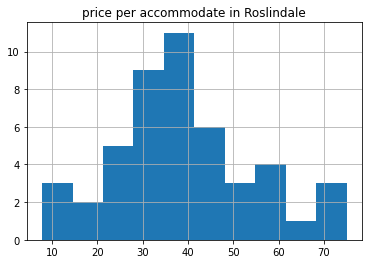

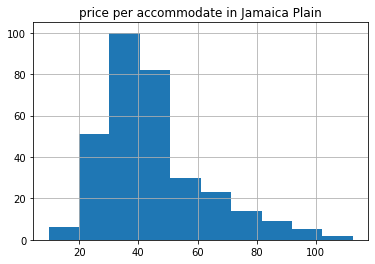

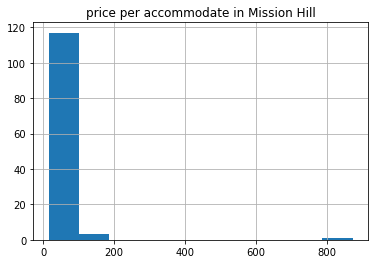

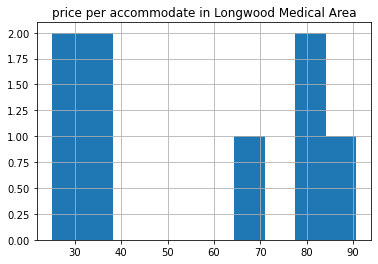

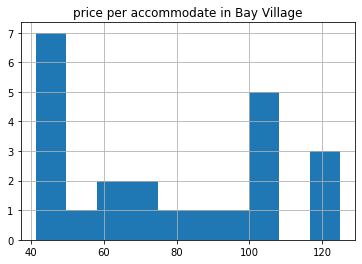

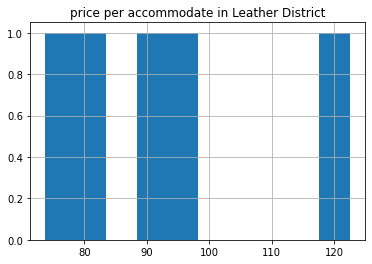

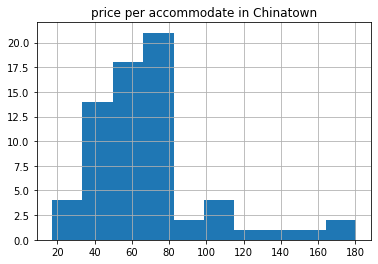

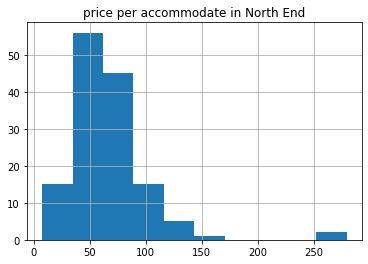

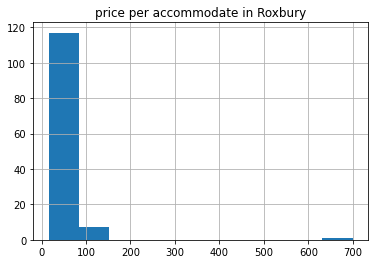

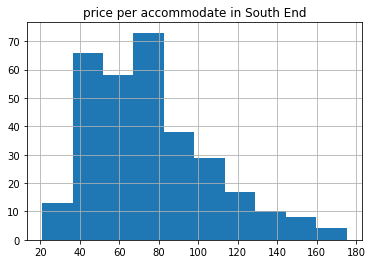

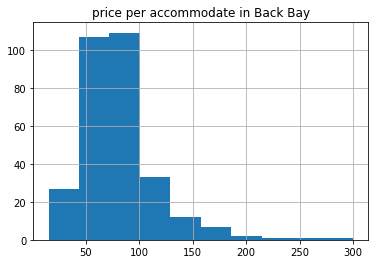

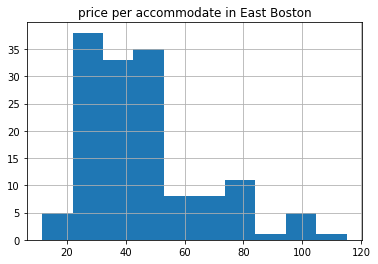

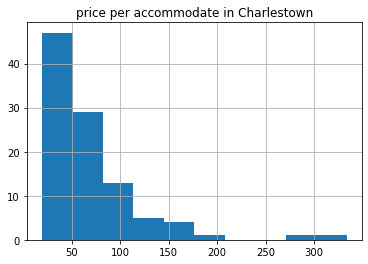

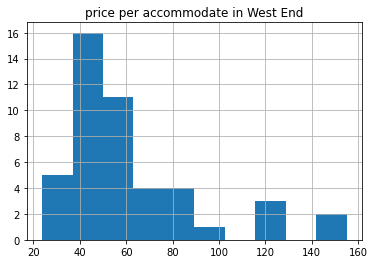

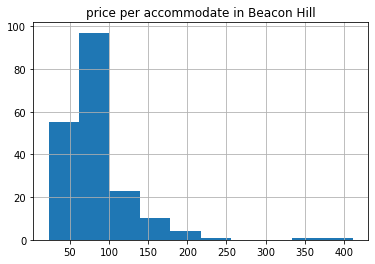

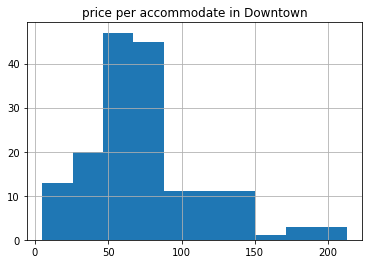

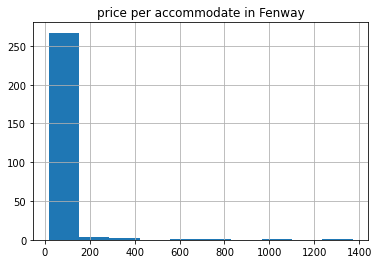

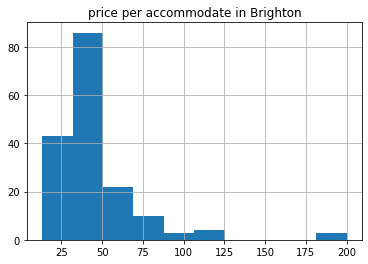

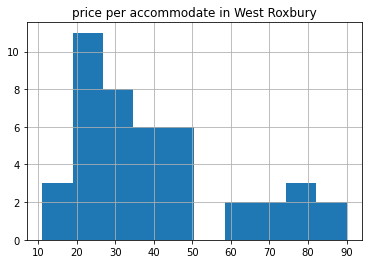

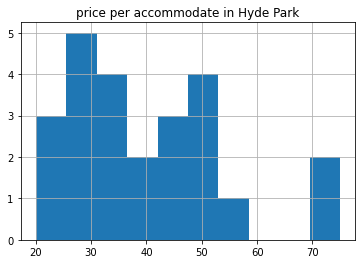

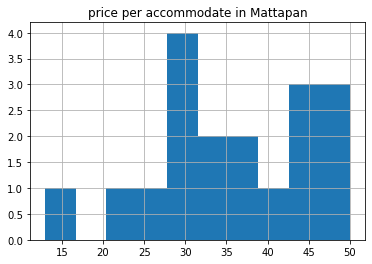

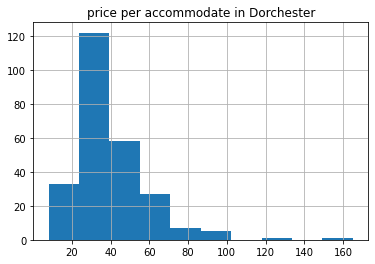

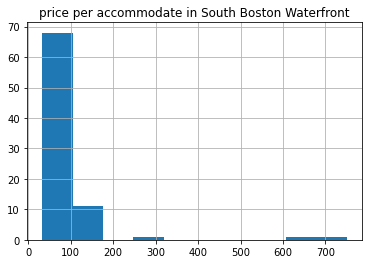

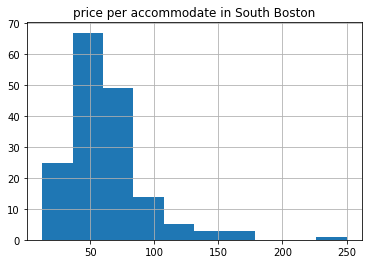

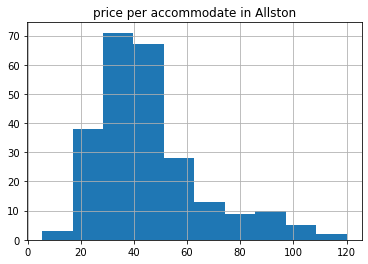

In [6]:
# histograms of price per accommodate per neighborhood
for neigh in n['neighborhood'].unique():
    n[n['neighborhood'] == neigh]['price per accommodate'].hist()
    plt.title('price per accommodate in ' + neigh)
    plt.show()

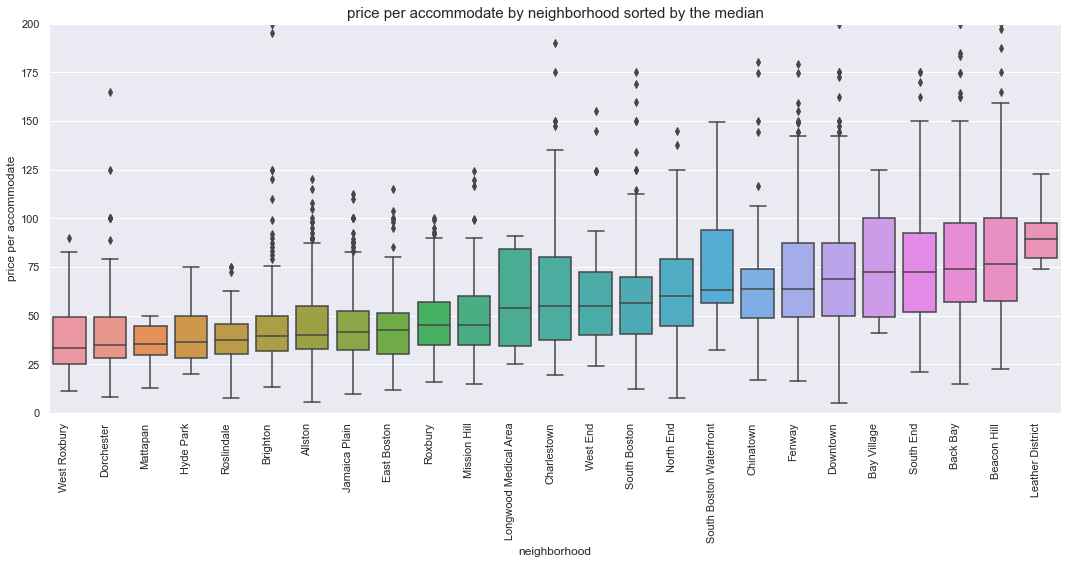

In [7]:
# boxplot price per accommodate by neighborhood sorted by the mean
grouped = n.loc[:,['neighborhood', 'price per accommodate']] \
    .groupby(['neighborhood']) \
    .median() \
    .sort_values(by='price per accommodate')

sns.set(rc={'figure.figsize':(15,8)})
bp = sns.boxplot(x=n.neighborhood, y=n['price per accommodate'], order=grouped.index)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.ylim(0,200)
plt.title('price per accommodate by neighborhood sorted by the median', fontsize=15)
plt.tight_layout()
plt.savefig('figures/boxplot_neigh.png')